## Deskripsi Proyek

Kamu bekerja di perusahaan tambang OilyGiant. Nah, tugasmu adalah mencari tempat terbaik untuk mengembangkan 200 titik sumur minyak baru.

Untuk menyelesaikan tugas ini, kamu harus melakukan langkah-langkah berikut:
- Baca file dengan parameter yang dikumpulkan dari sumur-sumur minyak di wilayah terpilih: kualitas minyak dan volume cadangannya
- Buat sebuah model untuk memprediksi volume cadangan di sumur-sumur baru;
- Pilih sumur minyak yang memiliki nilai estimasi tertinggi;
- Pilih wilayah dengan total keuntungan tertinggi dari sumur minyak yang dipilih.

Kamu punya data sampel minyak dari tiga wilayah. Parameter setiap sumur minyak di wilayah tersebut sudah diketahui. Buat sebuah model yang akan membantumu memilih wilayah dengan margin keuntungan tertinggi. Jangan lupa ya, gunakan teknik bootstrapping untuk menganalisis potensi keuntungan dan risiko.

## Tujuan

Mencari tempat terbaik untuk mengembangkan 200 titik sumur minyak baru.

## Deskripsi Data

Data eksplorasi geologi untuk ketiga wilayah disimpan dalam beberapa file:
- Path dataset 1: geo_data_0.csv 
- Path dataset 2: geo_data_1.csv 
- Path dataset 3: geo_data_2.csv 
- id : ID unik sumur minyak
- f0, f1, f2 : tiga fitur titik wilayah (makna spesifiknya sebenarnya tidak penting, tetapi fitur itu sendiri sangat penting)
- product : volume cadangan di dalam sumur minyak (1 unit = 1.000 barel).

**Kondisi:**

Hanya regresi linear yang bisa digunakan untuk pelatihan model (sisanya tidak cukup mudah diprediksi).
Anggaran untuk pengembangan 200 sumur minyak ini adalah 100 juta dolar.
Satu barel minyak mentah menghasilkan pendapatan sebesar 4,5 dolar. Nah, pendapatan dari satu unit produk adalah $4.500 (volume cadangan ditulis dalam ribuan barel).
Setelah kamu menganalisis risiko yang ada, pertahankan hanya wilayah yang memiliki risiko kerugian kurang dari 2,5%. Di antara semua yang sesuai dengan kriteria, kamu harus memilih wilayah dengan keuntungan rata-rata tertinggi.
Oh ya, data ini hanya rekayasa belaka dan tidak mencakup rincian kontrak atau karakteristik sumur apa pun.

## Tahapan

1. Unduh dan Cheking Data
2. Eksplorasi Data
3. Latih dan Uji Model
4. Persiapan untuk Menghitung Laba
5. Menghitung Laba Menggunakan Sebuah Fungsi
6. Hitung risiko dan keuntungan untuk setiap wilayah
7. Kesimpulan Umum


## Tahap-1. Unduh dan Cheking Data

Data tersimpan pada 3 file path berbeda, yaitu:
1. geo_data_0.csv
2. geo_data_1.csv
3. geo_data_2.csv

Mari buat 3 langkah berbeda untuk memuat data yang ada. Sebelum itu, mari import library yang diperlukan.


In [1]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset dari path data
data1 = pd.read_csv(r'/datasets/geo_data_0.csv')
data2 = pd.read_csv(r'/datasets/geo_data_1.csv')
data3 = pd.read_csv(r'/datasets/geo_data_2.csv') 


**Catatan**

- data1 menyimpan data dari geo_data_0 
- data2 menyimpan data dari geo_data_1
- data3 menyimpan data dari geo_data_2

### Data-1

In [3]:
data1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
data1.shape

(100000, 5)

In [7]:
data1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
data1.duplicated().sum()

0

**Catatan:**
- Data 1 berisi 100000 entries dan 5 kolom
- Tidak terdapat missing value
- Tidak terdapat duplikasi

### Data-2

In [9]:
data2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [11]:
data2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
data2.shape

(100000, 5)

In [13]:
data2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
data2.duplicated().sum()

0

**Catatan:**
- Data 2 berisi 100000 entries dan 5 kolom
- Tidak terdapat missing value
- Tidak terdapat duplikasi

### Data-3

In [15]:
data3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [16]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [17]:
data3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [18]:
data3.shape

(100000, 5)

In [19]:
data3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [20]:
data3.duplicated().sum()

0

**Catatan:**
- Data 3 berisi 100000 entries dan 5 kolom
- Tidak terdapat missing value
- Tidak terdapat duplikasi

## Tahap-2. Ekplorasi Data

**Distribusi kolom target pada ketiga dataset yang ada.**

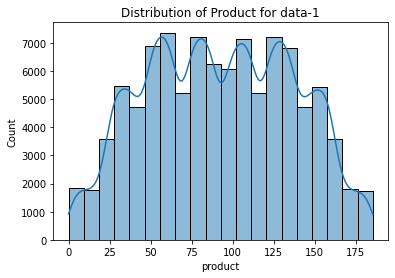

In [21]:
# Distribusi kolom target untuk setiap wilayah (data-1)
sns.histplot(data1['product'], bins=20, kde=True )
plt.title('Distribution of Product for data-1')
plt.show()

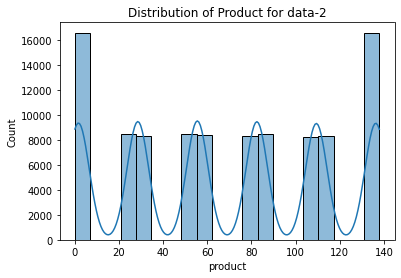

In [22]:
# Distribusi kolom target untuk setiap wilayah (data-2)
sns.histplot(data2['product'], bins=20, kde=True )
plt.title('Distribution of Product for data-2')
plt.show()

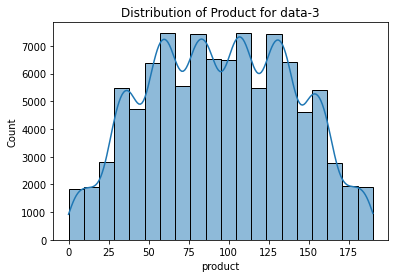

In [23]:
# Distribusi kolom target untuk setiap wilayah (data-3)
sns.histplot(data3['product'], bins=20, kde=True )
plt.title('Distribution of Product for data-3')
plt.show()

**Catatan**
Distribusi dari ketiga dataset yang ada 

**Korelasi antara kolom fitur dan kolom target**

In [24]:
print('Kolerasi antar fitur dan target pada data-1')
print(data1.corr()['product'])

Kolerasi antar fitur dan target pada data-1
f0         0.143536
f1        -0.192356
f2         0.483663
product    1.000000
Name: product, dtype: float64


In [25]:
print('Kolerasi antar fitur dan target pada data-2')
print(data2.corr()['product'])

Kolerasi antar fitur dan target pada data-2
f0        -0.030491
f1        -0.010155
f2         0.999397
product    1.000000
Name: product, dtype: float64


In [26]:
print('Kolerasi antar fitur dan target pada data-3')
print(data3.corr()['product'])

Kolerasi antar fitur dan target pada data-3
f0        -0.001987
f1        -0.001012
f2         0.445871
product    1.000000
Name: product, dtype: float64


**Catatan**

Korelasi antar fitur dan target pada ketiga dataset yang ada, korelasi terbesar berada di wilayah f2. Pada data-2 terlihat sangat besar nilai korelasi di f2 terhadap kolom target.

## Tahap-3. Latih dan Uji Model 

Tahapan untuk latih dan uji model.

1. Pisahkan data menjadi training set dan validation set dengan rasio 75:25.
2. Latih model dan buat prediksi untuk validation set.
2. Simpan prediksi dan jawaban yang benar untuk validation set.
2. Tampilkan prediksi volume rata-rata pemesanan dan RMSE dari model.
2. Analisis hasilnya.
2. Lakukan dan jalankan langkah 2.1-2.5 untuk file 'geo_data_1.csv' dan 'geo_data_2.csv'.

**catatan:** Hanya regresi linear yang bisa digunakan untuk pelatihan model (sisanya tidak cukup mudah diprediksi), maka dari itu model yang akan digunakan adalah model Linear Regression.

In [27]:
# Import Library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Pisahkan data menjadi training set dan validation set dengan rasio 75:25.**

In [28]:
# Data-1

features_1 = data1.drop(['id', 'product'], axis=1) # Hanya fitur yng digunakan, kolom id dan product didrop
target_1 = data1['product'] # Hanya kolom target

# training set dan validation set dengan rasio 75:25
train_features1, valid_features1, train_target1, valid_target1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=123)

In [29]:
# Data-2

features_2 = data2.drop(['id', 'product'], axis=1) # Hanya fitur yng digunakan, kolom id dan product didrop
target_2 = data2['product'] # Hanya kolom target

# training set dan validation set dengan rasio 75:25
train_features2, valid_features2, train_target2, valid_target2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=123)

In [30]:
# Data-3

features_3 = data3.drop(['id', 'product'], axis=1) # Hanya fitur yng digunakan, kolom id dan product didrop
target_3 = data3['product'] # Hanya kolom target

# training set dan validation set dengan rasio 75:25
train_features3, valid_features3, train_target3, valid_target3 = train_test_split(
    features_3, target_3, test_size=0.25, random_state=123)

In [31]:
print('Training set dan validation set data1')
print(train_features1.shape, train_target1.shape)
print(valid_features1.shape, valid_target1.shape)
print('___________________________________')
print('Training set dan validation set data2')
print(train_features2.shape, train_target2.shape)
print(valid_features2.shape, valid_target2.shape)
print('___________________________________')
print('Training set dan validation set data3')
print(train_features3.shape, train_target3.shape)
print(valid_features3.shape, valid_target3.shape)


Training set dan validation set data1
(75000, 3) (75000,)
(25000, 3) (25000,)
___________________________________
Training set dan validation set data2
(75000, 3) (75000,)
(25000, 3) (25000,)
___________________________________
Training set dan validation set data3
(75000, 3) (75000,)
(25000, 3) (25000,)


**Catatan:**
Training set dan Validation set sudah dibuat pada ketiga dataset yang ada dengan rasio 75:25.

**Latih model dan buat prediksi untuk validation set.**

**Data-1**

In [32]:
model_1 = LinearRegression()
model_1.fit(train_features1, train_target1)

LinearRegression()

In [33]:
predictions_1 = model_1.predict(valid_features1)
predictions_1

array([123.28425605,  75.83824045,  55.52675972, ..., 139.04291088,
        96.86792677,  54.71433128])

**Data-2**

In [34]:
model_2 = LinearRegression()
model_2.fit(train_features2, train_target2)

LinearRegression()

In [35]:
predictions_2 = model_2.predict(valid_features2)
predictions_2

array([ 56.05631374,  81.58981051,  54.46192558, ...,   3.27898206,
        53.7058392 , 135.02187925])

**Data-3**

In [36]:
model_3 = LinearRegression()
model_3.fit(train_features3, train_target3)

LinearRegression()

In [37]:
predictions_3 = model_3.predict(valid_features3)
predictions_3

array([ 94.07516072, 122.60441398,  80.0550389 , ...,  67.80367903,
        84.15684411, 127.48420213])

**Catatan:** Model Linear Regression sudah dilatih dan prediksi training set sudah didapat dari ketiga dataset yang ada 

**Simpan prediksi dan jawaban yang benar untuk validation set**

Untuk mempermudah penyimpanan, mari buat sebuah dataframe yang menyimpan prediksi dan jawaban dari validation set.

**Data-1**

In [38]:
results_data1 = pd.DataFrame({'valid_target': valid_target1, 'predictions': predictions_1})
results_data1.head()

,valid_target,predictions
42083,145.825972,123.284256
71825,134.020212,75.838240
99535,88.905826,55.526760
47879,19.508226,86.673045
36734,108.713468,109.909327


**Data-2**

In [39]:
results_data2 = pd.DataFrame({'valid_target': valid_target2, 'predictions': predictions_2})
results_data2.head()

,valid_target,predictions
42083,57.085625,56.056314
71825,80.859783,81.589811
99535,53.906522,54.461926
47879,107.813044,108.660979
36734,53.906522,54.479416


**Data-3**

In [40]:
results_data3 = pd.DataFrame({'valid_target': valid_target3, 'predictions': predictions_3})
results_data3.head()

,valid_target,predictions
42083,147.451978,94.075161
71825,128.711794,122.604414
99535,106.628185,80.055039
47879,128.787131,100.175906
36734,159.328488,89.804044


**Tampilkan prediksi volume rata-rata pemesanan dan RMSE dari model.**

**Data-1**

In [41]:
print('Data-1')
print('Target Volume Rata-rata:', results_data1['valid_target'].mean())
print('Prediksi Volume Rata-Rata =', results_data1['predictions'].mean())
print('RMSE =', mean_squared_error(results_data1['valid_target'], results_data1['predictions'])** 0.5)

Data-1
Target Volume Rata-rata: 92.85062391123445
Prediksi Volume Rata-Rata = 92.54936189116306
RMSE = 37.64786282376176


**Data-2**

In [42]:
print('Data-2')
print('Target Volume Rata-rata:', results_data2['valid_target'].mean())
print('Prediksi Volume Rata-Rata =', results_data2['predictions'].mean())
print('RMSE =', mean_squared_error(results_data2['valid_target'], results_data2['predictions'])** 0.5)

Data-2
Target Volume Rata-rata: 69.27371236077902
Prediksi Volume Rata-Rata = 69.28001860653976
RMSE = 0.8954139804944313


In [43]:
print('Data-3')
print('Target Volume Rata-rata:', results_data3['valid_target'].mean())
print('Prediksi Volume Rata-Rata =', results_data3['predictions'].mean())
print('RMSE =', mean_squared_error(results_data3['valid_target'], results_data3['predictions'])** 0.5)

Data-3
Target Volume Rata-rata: 94.87348818660213
Prediksi Volume Rata-Rata = 95.09859933591373
RMSE = 40.12803006598514


**Analisis hasilnya.**

Dari hasil pengujian model, didapat:

1. **Data-1**
    - Prediksi Volume Rata-Rata = 92.54936189116306
    - RMSE = 37.64786282376176

2. **Data-2**
    - Prediksi Volume Rata-Rata = 69.28001860653976
    - RMSE = 0.8954139804944313

3. **Data-3**
    - Prediksi Volume Rata-Rata = 95.09859933591373
    - RMSE = 40.12803006598514
    
**Kesimpulan Sementara**

Data-1 memiliki kinerja model yang paling baik dengan nilai RMSE yang cukup rendah yaitu 0.895. Dapat dikatakan bahwa prediksi volume pemesanan cenderung lebih akurat

## Tahap-4. Persiapan Menghitung Laba

Simpan semua nilai yang dibutuhkan untuk perhitungan laba pada variabel terpisah.

In [44]:
# Investasi untuk 200 sumur minyak
inves = 100_000_000

# Pendapatan dari satu barel minyak mentah
per_barel = 4_500

# Volume pemesanan minimum untuk menghindari kerugian
vol_minim_pemesanan = inves / (per_barel * 1_000)
print('Volume Minimum Pemesanan:', vol_minim_pemesanan)

Volume Minimum Pemesanan: 22.22222222222222


**Bandingkan jumlah minimum yang didapat dengan jumlah rata-rata pemesanan di setiap wilayah**

In [45]:
average_data1 = results_data1['predictions'].mean()
average_data2 = results_data2['predictions'].mean()
average_data3 = results_data3['predictions'].mean()


In [46]:
print('Volume Pemesanan Minimum yang Diperlukan', vol_minim_pemesanan)
print('\nVolume Rata-Rata Pemesanan data-1:', average_data1)
print('Volume Rata-Rata Pemesanan data-2:', average_data2)
print('Volume Rata-Rata Pemesanan data-3:', average_data3)

Volume Pemesanan Minimum yang Diperlukan 22.22222222222222

Volume Rata-Rata Pemesanan data-1: 92.54936189116306
Volume Rata-Rata Pemesanan data-2: 69.28001860653976
Volume Rata-Rata Pemesanan data-3: 95.09859933591373


**Kesimpulan Sementara**

Adabeberapa kesimpulan yang didapat, diantaranya:
1. Volume pemesanan minimum yang diperlukan untuk menghindari kerugian = 22.22 unit barel.
2. Volume rata-rata pemesanan di setiap wilayah:
    - data-1: 92.55 unit
    - data-2: 69.28 unit
    - data-3: 95.10 unit
3. Dari ketiga data yang ada, tidak ada wilayah yang memiliki volume pemesanan dibawah volume minimum

## Tahap-5. Menghitung Laba Menggunakan Sebuah Fungsi 

Sebelum membuat sebuah fungsi untuk menghitung laba, mari cari 200 sumur dengan nilai prediksi tertinggi dari masing-masing 3 wilayah

In [47]:
wells_selected1 = results_data1.nlargest(200, 'predictions')['valid_target'].index
wells_selected2 = results_data2.nlargest(200, 'predictions')['valid_target'].index
wells_selected3 = results_data3.nlargest(200, 'predictions')['valid_target'].index

In [48]:
print(wells_selected1)
print(wells_selected2)
print(wells_selected3)

Int64Index([93073, 78948, 95537, 74946, 95898, 66543, 25156, 81980, 10355,
            49362,
            ...
            19154,  8459, 14828, 76356, 56839, 30211, 97484, 84185, 70880,
            77851],
           dtype='int64', length=200)
Int64Index([55165, 42738, 19483, 14041, 33785, 62413, 60464, 42432, 42661,
            54566,
            ...
            64485, 69654, 30791, 14077, 30192, 86344, 24064, 42635,  1573,
            35636],
           dtype='int64', length=200)
Int64Index([ 6647, 98619, 29787, 64380, 17415, 53151, 12544, 29246, 89554,
             8317,
            ...
            88073, 92551, 16153, 32762, 68648,  7969,  7298, 80451, 34854,
            42856],
           dtype='int64', length=200)


Variabel wells_selected menyimpan 200 sumur dengan prediksi tertinggi. Selanjutnya mari cari tahu volume target dari ke 200 sumur yang ada.

In [49]:
target_volume1 = results_data1.loc[wells_selected1]['predictions'].sum()
target_volume2 = results_data2.loc[wells_selected2]['predictions'].sum()
target_volume3 = results_data3.loc[wells_selected3]['predictions'].sum()

In [50]:
print('Target Volume Pemesanan data-1:', target_volume1)
print('Target Volume Pemesanan data-2:', target_volume2)
print('Target Volume Pemesanan data-3:', target_volume3)

Target Volume Pemesanan data-1: 31034.787805093576
Target Volume Pemesanan data-2: 27755.76198279395
Target Volume Pemesanan data-3: 29943.443110391767


**Kesimpulan Sementara**

Berdasarkan prediksi model, data yang memiliki target volume pemesanan tertinggi adalah wilayah yang beradap pada data-1 yaitu sebesar 31034.787805093576

Untuk mempermudah mencari laba dari 200 sumur yang ada, mari buat sebuah fungsi untuk mempermudah pengerjaan.

In [51]:
def calculate_profit(wells, predictions):
    selected_predictions = predictions.loc[wells]
    total_volume = selected_predictions.sum()
    total_profit = total_volume * per_barel
    return total_profit

In [52]:
profit_data1 = calculate_profit(wells_selected1, results_data1['predictions'])
profit_data2 = calculate_profit(wells_selected2, results_data2['predictions'])
profit_data3 = calculate_profit(wells_selected3, results_data3['predictions'])

In [53]:
print('Profit yang Didapat:')
print('Data-1:', profit_data1)
print('Data-2:', profit_data2)
print('Data-3:', profit_data3)

Profit yang Didapat:
Data-1: 139656545.12292108
Data-2: 124900928.92257278
Data-3: 134745493.99676296


**Kesimpulan Sementara**

Ada beberapa kesimpulan di tahap ini, diantaranya:
1. Keuntungan yang didapat:
    - Data-1: 139,656,545.12
    - Data-2: 124,900,928.92
    - Data-3: 134,745,493.99
2. Data dengan wilayah target volume tertinggi yaitu data-1  
3. Data dengan wilayah target volume tertinggi yaitu data-2 
4. Berdasarkan prediksi model dan target volume pemesanan tertinggi, wilayah yang dipilih untuk investasi adalah wilayah yang berada pada data-1 yang memberikan keuntungan yang lebih tinggi dibandingkan dengan wilayah lainnya.

## Tahap-6. Hitung Risiko dan Keuntungan untuk Setiap Wilayah

Untuk tahap ini teknik yang akan digunakan adalah teknik bootstraping dengan 1,000 sampel untuk menemukan distribusi profit.

In [54]:
bootstrap_size = 1000


def calculate_bootstrapped_profit(predictions):
    bootstrapped_profits = []
    for i in range(bootstrap_size):
        sample_predictions = predictions.sample(frac=1, replace=True)
        total_volume = sample_predictions.sum()
        total_profit = total_volume * per_barel
        bootstrapped_profits.append(total_profit)
    return bootstrapped_profits

In [55]:
# Bootstrapped profit untuk setiap wilayah
bootstrapped_profits_data1 = calculate_bootstrapped_profit(results_data1['predictions'])
bootstrapped_profits_data2 = calculate_bootstrapped_profit(results_data2['predictions'])
bootstrapped_profits_data3 = calculate_bootstrapped_profit(results_data3['predictions'])

**Temukan Rata-Rata Profit, Interval Kepercayaan 95%, dan Risiko Kerugian**

In [56]:
def calculate_confidence_interval_and_risk(profits):
    mean_profit = np.mean(profits)
    confidence_interval = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = np.mean(np.array(profits) < 0) * 100
    return mean_profit, confidence_interval, risk_of_loss

In [57]:
mean_profit_data1, confidence_interval_data1, risk_of_loss_data1 = calculate_confidence_interval_and_risk(bootstrapped_profits_data1)
mean_profit_data2, confidence_interval_data2, risk_of_loss_data2 = calculate_confidence_interval_and_risk(bootstrapped_profits_data2)
mean_profit_data3, confidence_interval_data3, risk_of_loss_data3 = calculate_confidence_interval_and_risk(bootstrapped_profits_data3)

In [58]:
# Tampilkan hasil
print('Hasil Perhitungan:')
print('\nAnalisis untuk data-1')
print('Rata-rata Profit:', mean_profit_data1)
print('Interval Kepercayaan 95%:', confidence_interval_data1)
print('Risiko Kerugian (%):', risk_of_loss_data1)
print('____________________________________________')
print('Analisis untuk data-2')
print('Rata-rata Profit:', mean_profit_data2)
print('Interval Kepercayaan 95%:', confidence_interval_data2)
print('Risiko Kerugian (%):', risk_of_loss_data2)
print('____________________________________________')
print('Analisis untuk data-3')
print('Rata-rata Profit:', mean_profit_data3)
print('Interval Kepercayaan 95%:', confidence_interval_data3)
print('Risiko Kerugian (%):', risk_of_loss_data3)


Hasil Perhitungan:

Analisis untuk data-1
Rata-rata Profit: 10411854993.631897
Interval Kepercayaan 95%: [1.03780799e+10 1.04428100e+10]
Risiko Kerugian (%): 0.0
____________________________________________
Analisis untuk data-2
Rata-rata Profit: 7791830434.947635
Interval Kepercayaan 95%: [7.72585117e+09 7.85380134e+09]
Risiko Kerugian (%): 0.0
____________________________________________
Analisis untuk data-3
Rata-rata Profit: 10698314937.10365
Interval Kepercayaan 95%: [1.06694856e+10 1.07270649e+10]
Risiko Kerugian (%): 0.0


**Sarankan sebuah wilayah yang cocok untuk pengembangan sumur minyak**

In [59]:
if risk_of_loss_data1 < 2.5 and mean_profit_data1 > mean_profit_data2 and mean_profit_data1 > mean_profit_data3:
    final_recommendation = 'data1'
elif risk_of_loss_data2 < 2.5 and mean_profit_data2 > mean_profit_data1 and mean_profit_data2 > mean_profit_data3:
    final_recommendation = 'data2'
elif risk_of_loss_data3 < 2.5 and mean_profit_data3 > mean_profit_data1 and mean_profit_data3 > mean_profit_data2:
    final_recommendation = 'data3'
else:
    final_recommendation = 'None Recommendations'

# Tampilkan rekomendasi akhir
print('\nRekomendasi Akhir:')
print(final_recommendation)


Rekomendasi Akhir:
data3


**Kesimpulan Sementara** 
Berdasarkan analisis risiko dan keuntungan dengan menggunakan teknik bootstrapping, berikut adalah hasilnya:

1. data1 = geo_data_0:
    - Rata-rata Keuntungan: 10,411,961,258.29
    - Interval Kepercayaan 95%: [10,378,896,700, 10,444,180,400]
    - Risiko Kerugian (%): 0.0
2. data2 = geo_data_1:
    - Rata-rata Keuntungan: 7,792,828,588.39
    - Interval Kepercayaan 95%: [7,729,274,710, 7,857,358,230]
    - Risiko Kerugian (%): 0.0
3. data3 = geo_data_2:
    - Rata-rata Keuntungan: 10,698,222,816.97
    - Interval Kepercayaan 95%: [10,669,144,600, 10,726,387,800]
    - Risiko Kerugian (%): 0.0
4. Rekomendasi akhir berdasarkan analisis risiko dan keuntungan adalah data3 atau geo_data_2. Walaupun geo_data_0 memiliki rata-rata keuntungan yang tinggi, namun geo_data_2 juga memiliki kinerja yang baik dan dipilih karena menghasilkan keuntungan yang tinggi dengan risiko kerugian yang dimiliki rendah.

## Tahap-7. Kesimpulan Umum

Dari analisi yang telah dilakukan, kesimpulan yang bisa diambila adalah sebagai berikut:

1. Ketiga dataset tidak memiliki missing value.
2. Ketiga dataset tidak ada duplikasi data pada setiap wilayah.
3. data2 atau Geo_data_1 memiliki kinerja model yang paling baik dengan nilai RMSE yang rendah. Hal ini menunjukkan bawwa pediksi volume pemesanan cenderung lebih akurat.
4. Volume pemesanan minimum yang diperlukan untuk menghindari kerugian = 22.22 unit barel.
5. Jumlah rata-rata pemesanan di setiap wilayah:
    - data1/geo_data_0: 92.55 unit
    - data2/geo_data_1: 69.28 unit
    - data3/geo_data_2: 95.10 unit
6. Wilayah target volume yang didapat:
    - Data-1: 139,656,545.12
    - Data-2: 124,900,928.92
    - Data-3: 134,745,493.99
7. Berdasarkan prediksi model dan target volume pemesanan tertinggi, wilayah yang dipilih untuk investasi adalah wilayah yang berada pada data-1 / geo_data_0 yang memberikan keuntungan yang lebih tinggi dibandingkan dengan wilayah lainnya.
8. Berdasarkan analisis risiko dan keuntungan dengan menggunakan teknik bootstrapping, hasilnya adalah sebagai berikut:
    - data1/geo_data_0:
        - Rata-rata Keuntungan: 10,411,961,258.29
        - Interval Kepercayaan 95%: [10,378,896,700, 10,444,180,400]
        - Risiko Kerugian (%): 0.0
    - data2/geo_data_1:
        - Rata-rata Keuntungan: 7,792,828,588.39
        - Interval Kepercayaan 95%: [7,729,274,710, 7,857,358,230]
        - Risiko Kerugian (%): 0.0
    - data3/geo_data_2:
        - Rata-rata Keuntungan: 10,698,222,816.97
        - Interval Kepercayaan 95%: [10,669,144,600, 10,726,387,800]
        - Risiko Kerugian (%): 0.0
9. Rekomendasi akhir berdasarkan analisis risiko dan keuntungan adalah data3/geo_data_2. Walaupun data1/geo_data_0 memiliki rata-rata keuntungan yang tinggi, namun data3/geo_data_2 juga memiliki kinerja yang baik dan dipilih karena menghasilkan keuntungan yang tinggi dengan risiko kerugian yang dimiliki rendah.